<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/face/%E5%86%92%E9%9A%AA38_%E7%94%A8_DeepFace_%E4%BE%86%E5%81%9A%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

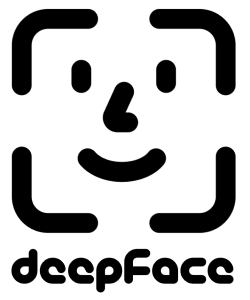


這裡介紹一個叫 [DeepFace](https://github.com/serengil/deepface) 的套件，希望你能得到點啟發，神速做個有趣的小 app 出來!

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

這次我們會用到 OpenCV，來做一下照片上的處理。

In [3]:
import cv2

### 1. 安裝並導入 DeepFace

In [4]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=e0b421662392c84e682a20fbbe6cc9f40f1815204af23414385acb6ba767b44d
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [5]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [6]:
from deepface import DeepFace
import gradio as gr

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


### 2. 讀入範例照片集

之後可以依範例這樣，一個人就一個資料夾，每個資料夾裡面甚至可以只有一張照片!

讀入 `photos.zip`。

In [7]:
!wget --no-check-certificate \
    https://github.com/yenlung/Python-AI-Book/raw/main/dataset/photos.zip \
    -O /content/photos.zip

--2023-06-03 16:01:14--  https://github.com/yenlung/Python-AI-Book/raw/main/dataset/photos.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/photos.zip [following]
--2023-06-03 16:01:15--  https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/photos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758026 (1.7M) [application/zip]
Saving to: ‘/content/photos.zip’

/content/photos.zip 100%[===================>]   1.68M  --.-KB/s    in 0.01s   

2023-06-03 16:01:15 (161 MB/s) - ‘/content/photos.zip’ saved [1758026/1758026]



再來就是解壓縮。

In [8]:
import zipfile

local_zip = '/content/photos.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

我們在 `/content/photos` 這個資料夾下的架構如下:

> faces: 每個人有獨立的資料夾。

> 另外有準備做測試的一些照片。

先把photos的路徑和底下的資料夾路徑分別定成變數

In [9]:
base_dir = "/content/photos"
face_dir = "/content/photos/faces"

### 3. 照片展示程式

這裡只是秀出照片，看照片內容是什麼。

In [10]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

使用方式是這樣，如果有一張照片 `im01` 要秀出來:

```python
show_image(im01)
```

多張照片同時要秀出來也可以，比如說:

```python
show_image(im01, im02)
```

等等。

In [11]:
im01_path = base_dir + "/" + "yenjan.jpg"
im01 = cv2.imread(im01_path)

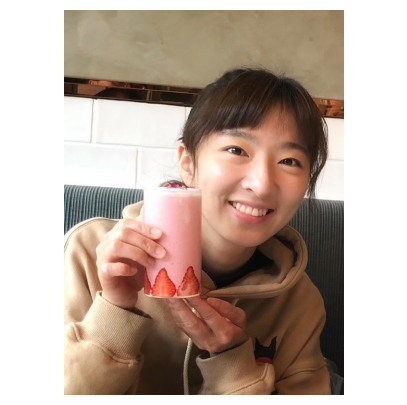

In [12]:
show_image(im01)

In [13]:
im02_path = face_dir + "/yenjan/" + "yenjan02.jpg"
im02 = cv2.imread(im02_path)

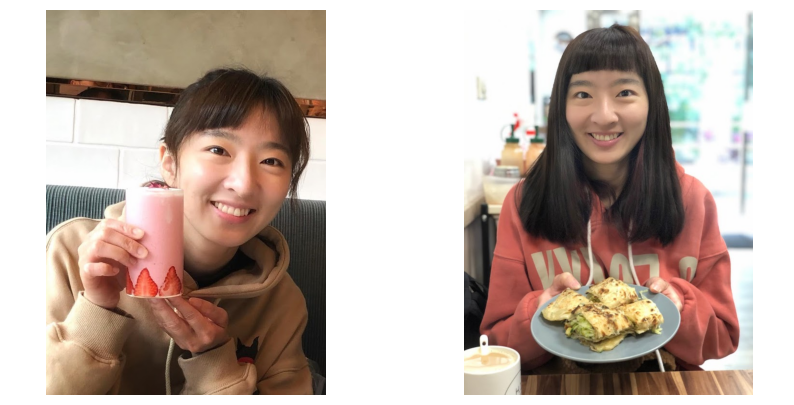

In [14]:
show_image(im01, im02)

### 4. `verify` 看兩個人是不是同一個人

In [15]:
result  = DeepFace.verify(im01, im02)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:25<00:00, 23.0MB/s]


我們看看 `result`。

In [16]:
result

{'verified': True,
 'distance': 0.20938344854538815,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 242, 'y': 199, 'w': 271, 'h': 271},
  'img2': {'x': 183, 'y': 93, 'w': 218, 'h': 218}},
 'time': 40.87}

我們可以簡單的呈現模型的分辨結果。

In [17]:
print(f"{result['model']}: {result['verified']}")

VGG-Face: True


這裡的重點是 `verified`，看是否為同一個人。因此我們也可以直接看結論:

```python
result[`verified`]
```

另外我們還可以選不同的 `model` 來做這件事。有多項選擇可用:

* `VGG-Face`
* `Facenet`
* `Facenet512`
* `OpenFace`
* `DeepFace`
* `DeepID`
* `ArcFace`
* `Dlib`

比如說我們想試試 `Facenet512`，就指定參數``model_name=`Facenet512``。

In [18]:
result  = DeepFace.verify(im01, im02, model_name="Facenet512")

facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:05<00:00, 18.7MB/s]


In [19]:
print(f"{result['model']}: {result['verified']}")

Facenet512: False


### 5. `find` 辨識一下這位是誰

我們來挑選一位通緝犯, 我是說, 本書的其中一位作者。

In [20]:
im03_path = base_dir + "/" + "tseyu.jpg"
im03 = cv2.imread(im03_path)

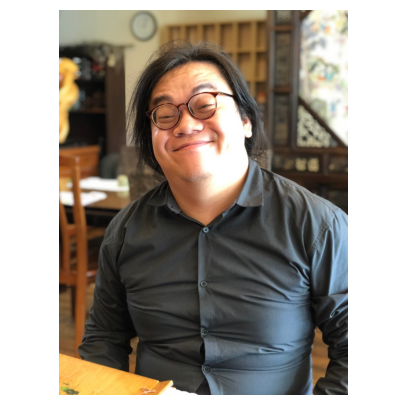

In [21]:
show_image(im03)

以下就是人臉辨識示範。我們只需要輸入照片的檔名, 再來是放有每個人照片資料夾的路徑就好。這裡用了

```python
enforce_detection=False
```

是有時系統找不到人臉在哪裡 (!#@*$) 於是我們就說找不到就別找了。

In [22]:
df = DeepFace.find(im03, db_path=face_dir, enforce_detection=False)

Finding representations: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Representations stored in /content/photos/faces/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  4.798475503921509  seconds


In [28]:
print(df)

[                                    identity  source_x  source_y  source_w  \
0    /content/photos/faces/tseyu/tseyu01.jpg       251       206       354   
1  /content/photos/faces/yanwen/yanwen01.jpg       251       206       354   
2    /content/photos/faces/tseyu/tseyu01.jpg       251       206       354   

   source_h  VGG-Face_cosine  
0       354         0.193754  
1       354         0.343910  
2       354         0.392973  ]


In [29]:
df1 = pd.DataFrame(df, columns=['identity',	'source_x',	'source_y',	'source_w','source_h' , 'VGG-Face_cosine'])

ValueError: ignored

這是一個 `pandas` (終於出現了!) 的 DataFrame。第 0 筆數據就是判定最像的那一位! 因為我們把每個人的名字當資料夾名稱, 所以想辦法找出資料夾名稱, 我們就知道是誰了!

In [ ]:
name = df['identity'][0].split('/')[-2]

In [ ]:
print(f"我辨識這位是 {name}。")

如果我們想看看最像的那位的照片，究竟有多像，也可以像之前一樣透過路徑和 ``show_image`` 函式將找到的照片展示出來。。

In [ ]:
im04_path = df['identity'][0]
im04 = cv2.imread(im04_path)
show_image(im04)

DeepFace 竟然可以在有兩個人的照片中，找出像長的像是襯衫很緊的作者的照片，這真是太厲害了！

### 6. `analyze` 分析一下照片中這個人

我們可以分析一下照片中這個人的性別、年齡、種族、情緒!

In [ ]:
im05_path = base_dir + '/' + "yenlung.jpg"
im05 = cv2.imread(im05_path)

In [ ]:
show_image(im05)

In [ ]:
obj = DeepFace.analyze(im05_path)

看一下究竟分析了什麼?

In [ ]:
obj

只想分辨這四個資訊的某幾個，也可以指定參數actions並將想分析的人物資訊放進來，舉例來說：

In [ ]:
obj = DeepFace.analyze(im05_path, actions=['age', 'emotion'])

這裡做個簡單示範, 看我們如何更親切的呈現結果。

In [ ]:
labels = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼',
          'happy':'開心', 'neutral':'沒什麼特別表情', 
          'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印弟安',
          'latino hispanic':'拉丁美洲 (西班牙裔)', 
          'middle eastern':'中東', 'white':'白'}

In [ ]:
def show_info(obj):
    age = obj['age']
    emotion = labels[obj['dominant_emotion']]
    race = labels[obj['dominant_race']]
    gender = labels[obj['gender']]
    if gender=='女':
        spam = '她'
    else:
        spam = '他'
    text = f"這是一位 {age} 歲的{race}人{gender}子，{spam}感覺是{emotion}的。"
    return text

In [ ]:
obj = DeepFace.analyze(im05_path)

In [ ]:
show_image(im05)
print(show_info(obj))

## 7. 照片預處理

DeepFace 中的 `preprocess_face` 函式可以幫我們找到照片中的人臉位置，並將把圖片中人臉以外的位置切除掉且自動幫我們把臉稍微的轉正。

In [ ]:
from deepface.commons.functions import preprocess_face

``preprocess_face`` 函式可以幫助我們將一張圖片人臉抓取出來

In [ ]:
im01p = preprocess_face(im01_path,
                        detector_backend="mtcnn"
                        )

In [ ]:
im01p.shape

我們發現就是把臉的部份切出來! 注意這時照片的 `shape` 是 (1, 224, 224, 3)，所以要把照片拿出來是用 `im01p[0]`。

In [ ]:
show_image(im01, im01p[0])

我們也可以看看剛剛那位 37 歲的開心亞洲男子跟他的臉部位置。

In [ ]:
im02p = preprocess_face(im05_path,
                        detector_backend="mtcnn"
                        )

show_image(im05, im02p[0])

## 8. 使用 Gradio 快速建造 Web 版人臉辨識與情緒分析 App

平常如果從 `gradio` 輸入一張照片，即使是一個照片檔，`gradio` 都會好心的幫我們轉成 `numpy array`。但我們就是想要讓 `gradio` 不要動，直接接受照片檔可以嗎? 答案是肯定的，那就要在 `inputs` 時設好 `type`。

```python
inputs = gr.Image(type="file")
```

那我們的照片要用 webcam 輸入呢? 那也很容易，就指定 `source="webcam"` 就可以了!

```python
inputs = gr.Image(source="webcam")
```

注意我們 `image` 的 `type` 設為 `file`，意思是我們可以直接把照片讀進來，「檔案」的名稱在 `img.name` 裡面。



In [ ]:
inputs = gr.Image(label="來張自拍", 
                  source="webcam", 
                  type="file")

output_text = gr.Textbox(label="AI 辨識結果")
output_img = gr.Image(label="AI 辨識結果")

In [ ]:
def webapp(img):
    obj = DeepFace.analyze(img_path=img.name, 
                           actions = ['age', 'gender', 'race', 'emotion'],
                           enforce_detection=False
                           )
    img_process = preprocess_face(img.name,
                                  detector_backend="mtcnn",
                                  enforce_detection=False
                                  )[0][:,:,::-1]
    return show_info(obj), img_process

In [ ]:
iface = gr.Interface(fn=webapp,
                     inputs=inputs,
                     outputs=[output_text, output_img],
                     title="AI 辨識器",
                     description="點一下自拍, 讓我來猜猜你的年紀、種族、性別還有現在的情緒是什麼。").launch(share=True)